In [1]:
!pip install mysql-connector-python matplotlib pandas

   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB 393.8 kB/s eta 0:00:37
   ---------------------------------------- 0.1/14.5 MB 901.1 kB/s eta 0:00:16
   - -------------------------------------- 0.4/14.5 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/14.5 MB 3.8 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/14.5 MB 4.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.5/14.5 MB 4.8 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/14.5 MB 5.7 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/14.5 MB 5.9 MB/s eta 0:00:03
   -------- ------------------------------- 3.0/14.5 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.5/14.5 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 4.1/14.5 MB 7.4 MB/s eta 0:00:02
   ------

In [40]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


### Conectar a la base de datos

In [3]:
def connect_to_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="123456",
        database="ss"
    )

### Realizar una consulta y devolver los datos en un DataFrame de pandas

In [4]:
def fetch_data(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    connection.close()
    return df

### Graficar los datos

In [53]:
def plot_data(df):
    df.plot(kind='bar', x='localidad', y='consultorios')
    plt.xlabel('Localidades')
    plt.ylabel('Consultorios')
    plt.title('Cantidad de consultorios de 10 localidades de Sonora')
    plt.show()

### Obtener datos y graficar

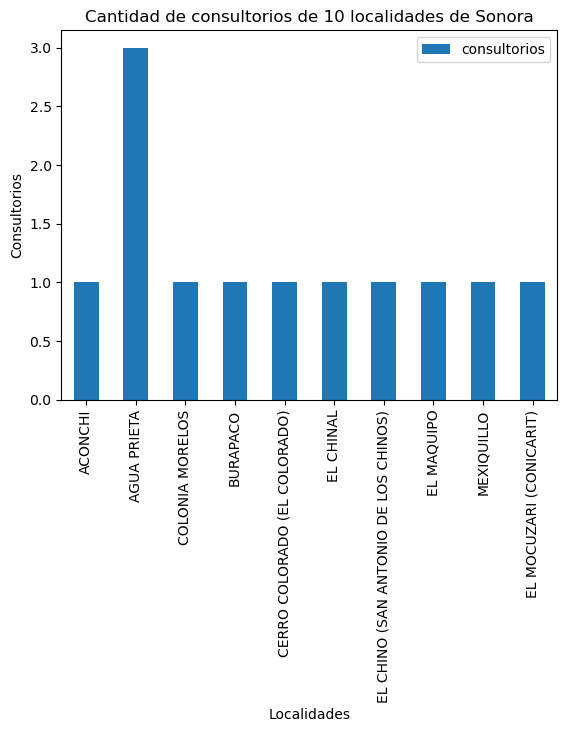

In [54]:
query = "SELECT * FROM ss.rss_2023 where entidad='Sonora';" # Sacamos todos los datos utiles de Sonora
data_df = fetch_data(query)
plot_df = data_df[0:10]
plot_data(plot_df)

### Imprimir los datos en forma de tabla

In [55]:
def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='psql'))

### Definir tu consulta

In [56]:
query = "SELECT id,name,district,population FROM city where District='Sonora'"

### Obtener datos y imprimir tabla

In [58]:
query = "SELECT localidad from rss_2023"
data_df = fetch_data(query)
print_table(data_df)

+-------+------------------------------------------------------------------------------+
|       | localidad                                                                    |
|-------+------------------------------------------------------------------------------|
|     0 | AGUASCALIENTES                                                               |
|     1 | AGUASCALIENTES                                                               |
|     2 | AGUASCALIENTES                                                               |
|     3 | AGUASCALIENTES                                                               |
|     4 | AGUASCALIENTES                                                               |
|     5 | AGUASCALIENTES                                                               |
|     6 | AGUASCALIENTES                                                               |
|     7 | AGUASCALIENTES                                                               |
|     8 | AGUASCALIEN